# Load packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the dataset for this chunk (9/10).
Chunk 1 used for fine tuning.

In [2]:
df = pd.read_csv('C:/Users/rmcarri/OneDrive - Emory University/NHANES/Macronutrients LLMs/03.Results/Adolescents/FT 10epochs v2/df_val_with_answers_chunk9.csv')
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
0,0,92246,2,"CHEESE, AMERICAN (21); CHICKEN BREAST, SAUTEED...",1932,104.58,247.21,58.06,11.9,56.82,...,1,5.00,NaN,0.0,0.0,NaN,NaN,92246_NHANES_2015_2016,1932; 104.58; 247.21; 58.06; 11.9; 56.82,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1,1,92250,2,"MILK, REDUCED FAT (2%) (488); CHEESE, MOZZAREL...",1865,67.93,267.29,138.23,29.9,64.93,...,2,0.58,NaN,0.0,0.0,0.0,NaN,92250_NHANES_2015_2016,1865; 67.93; 267.29; 138.23; 29.9; 64.93,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
2,2,92258,2,"YOGURT, GREEK, NONFAT MILK, FRUIT (245); CRACK...",1676,62.00,272.92,114.91,18.1,39.19,...,5,1.25,NaN,0.0,0.0,0.0,0.0,92258_NHANES_2015_2016,1676; 62.0; 272.92; 114.91; 18.1; 39.19,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
3,3,92264,2,"LIGHT ICE CREAM, SOFT SERVE CONE, FLAVORS OTHE...",1244,43.85,156.80,80.33,5.9,49.96,...,1,2.11,NaN,0.0,0.0,1.0,NaN,92264_NHANES_2015_2016,1244; 43.85; 156.8; 80.33; 5.9; 49.96,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
4,4,92267,2,"MILK, REDUCED FAT (2%) (335.5); PEANUT BUTTER ...",859,25.42,109.63,55.26,6.4,37.81,...,3,3.52,NaN,0.0,0.0,NaN,NaN,92267_NHANES_2015_2016,859; 25.42; 109.63; 55.26; 6.4; 37.81,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,119717,2,"MILK, REDUCED FAT (2%) (320.25); COFFEE CREAME...",3076,125.13,305.99,125.31,27.5,151.75,...,3,4.97,NaN,0.0,0.0,NaN,NaN,119717_NHANES_2017_March2020,3076; 125.13; 305.99; 125.31; 27.5; 151.75,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1124,1124,119719,2,"PORK, CHOP, COATED, LEAN ONLY EATEN (120); DOU...",1457,58.14,179.82,65.28,8.9,55.82,...,3,2.24,NaN,0.0,0.0,NaN,NaN,119719_NHANES_2017_March2020,1457; 58.14; 179.82; 65.28; 8.9; 55.82,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1125,1125,119724,2,"MILK, LOW FAT (1%) (81.33); MILK, LOW FAT (1%)...",1194,33.95,183.45,68.56,9.3,37.02,...,4,1.16,NaN,0.0,0.0,NaN,NaN,119724_NHANES_2017_March2020,1194; 33.95; 183.45; 68.56; 9.3; 37.02,USER:\n\nPlease analyze the patient's dietary ...
1126,1126,119736,2,"SOUR CREAM, REGULAR (22.5); BURRITO BOWL, CHIC...",962,28.71,160.42,98.00,6.8,23.84,...,1,0.02,NaN,0.0,1.0,0.0,NaN,119736_NHANES_2017_March2020,962; 28.71; 160.42; 98.0; 6.8; 23.84,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...


# The output from the fine tuned model needs post-processing.
Post-process the output of the fine-tuned model.

Verify the new (post-processed) output is accurate.

Drop rows that cannot be post-processed (i.e., in a completely wrong format or did not yield the desired information).

In [3]:
# Post-process the LLM_Fine_Tuned content
def extract_numbers_after_response(text):
    response_section = text.split("### Response:")[-1].strip()   # Find everything after "### Response:"
    return "; ".join(response_section.split(";"))   # Extract the numbers and join them with semicolons

# Apply the function to your DataFrame column
df['LLM_Fine_Tuned'] = df['LLM_Fine_Tuned'].apply(extract_numbers_after_response)

In [4]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_Fine_Tuned'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}. I.e., these rows need post-processing.")
print(f"Consistent rows: {sum(mask)}. I.e., all rows are as expected, not need to post-process.")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1128
Inconsistent rows: 53. I.e., these rows need post-processing.
Consistent rows: 1075. I.e., all rows are as expected, not need to post-process.


,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
7,7,92285,2,"MILK, REDUCED FAT (2%) (274.5); LIQUID FROM ST...",1577,39.46,263.81,54.09,10.5,40.38,...,2,1.47,NaN,0.0,0.0,NaN,NaN,92285_NHANES_2015_2016,1577; 39.46; 263.81; 54.09; 10.5; 40.38,USER:\n\nPlease analyze the patient's dietary ...
13,13,92388,2,"MILK, REDUCED FAT (2%) (259.25); MILK, REDUCED...",1079,25.62,180.69,106.17,7.2,28.15,...,3,2.29,NaN,0.0,0.0,NaN,NaN,92388_NHANES_2015_2016,1079; 25.62; 180.69; 106.17; 7.2; 28.15,USER:\n\nPlease analyze the patient's dietary ...
60,60,92910,2,"YOGURT, NONFAT MILK, FLAVORS OTHER THAN FRUIT ...",1971,42.20,243.39,138.94,10.7,100.44,...,5,1.77,NaN,0.0,0.0,0.0,NaN,92910_NHANES_2015_2016,1971; 42.2; 243.39; 138.94; 10.7; 100.44,"INSTRUCTIONS:\n24-hour dietary recall: YOGURT,..."
82,82,93152,2,"CHICKEN BREAST, SAUTEED, SKIN NOT EATEN (67.5)...",1943,84.24,267.23,90.90,13.1,60.56,...,1,1.76,NaN,0.0,0.0,NaN,NaN,93152_NHANES_2015_2016,1943; 84.24; 267.23; 90.9; 13.1; 60.56,USER:\n\nPlease analyze the patient's dietary ...
111,111,93372,2,"MILK, REDUCED FAT (2%) (442.25); MILK, REDUCED...",1293,38.71,216.94,164.63,3.3,32.83,...,3,1.58,NaN,0.0,0.0,NaN,NaN,93372_NHANES_2015_2016,1293; 38.71; 216.94; 164.63; 3.3; 32.83,USER:\n\nPlease analyze the patient's dietary ...
127,127,93517,2,"MILK, LOW FAT (1%) (183); CHEESE, AMERICAN, RE...",1691,49.89,292.27,165.14,12.9,39.28,...,1,NaN,NaN,0.0,0.0,NaN,NaN,93517_NHANES_2015_2016,1691; 49.89; 292.27; 165.14; 12.9; 39.28,USER:\n\nPlease analyze the patient's dietary ...
136,136,93646,2,"MILK, WHOLE (91.5); CHICKEN BREAST, FRIED, COA...",1370,52.83,175.29,53.58,9.6,53.29,...,4,3.09,NaN,0.0,0.0,0.0,NaN,93646_NHANES_2015_2016,1370; 52.83; 175.29; 53.58; 9.6; 53.29,USER:\n\nPlease analyze the patient's dietary ...
157,157,109446,2,"CHOCOLATE MILK, READY TO DRINK, WHOLE (449.5);...",3107,113.19,393.74,202.15,16.2,123.42,...,3,0.85,NaN,0.0,0.0,NaN,NaN,109446_NHANES_2017_March2020,3107; 113.19; 393.74; 202.15; 16.2; 123.42,USER:\n\nPlease analyze the patient's dietary ...
181,181,109702,2,"CHOCOLATE MILK, MADE FROM SYRUP WITH REDUCED F...",1721,56.61,205.16,73.79,13.0,75.28,...,4,4.27,NaN,0.0,0.0,NaN,NaN,109702_NHANES_2017_March2020,1721; 56.61; 205.16; 73.79; 13.0; 75.28,INSTRUCTIONS:\n24-hour dietary recall: CHOCOLA...
189,189,109777,2,"CHICKEN TENDERS OR STRIPS, BREADED, FROM SCHOO...",454,11.41,86.82,42.33,4.3,7.53,...,4,1.58,NaN,0.0,0.0,NaN,NaN,109777_NHANES_2017_March2020,454; 11.41; 86.82; 42.33; 4.3; 7.53,USER:\n\nPlease analyze the patient's dietary ...


In [5]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1075, 23)

# Create the variables (columns) for the predicted energy and macronutrients.
From the fine-tuned model.

In [6]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_Fine_Tuned'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,smoker,id,Expected_Output,LLM_Fine_Tuned,DRxIKCAL_pred_ft,DRxIPROT_pred_ft,DRxICARB_pred_ft,DRxISUGR_pred_ft,DRxIFIBE_pred_ft,DRxITFAT_pred_ft
0,0,92246,2,"CHEESE, AMERICAN (21); CHICKEN BREAST, SAUTEED...",1932,104.58,247.21,58.06,11.9,56.82,...,NaN,92246_NHANES_2015_2016,1932; 104.58; 247.21; 58.06; 11.9; 56.82,1731; 103.1; 230.91; 49.1; 12.7; 48.31,1731,103.10,230.91,49.10,12.7,48.31
1,1,92250,2,"MILK, REDUCED FAT (2%) (488); CHEESE, MOZZAREL...",1865,67.93,267.29,138.23,29.9,64.93,...,NaN,92250_NHANES_2015_2016,1865; 67.93; 267.29; 138.23; 29.9; 64.93,2335; 89.85; 331.8; 169.1; 32.3; 76.9,2335,89.85,331.80,169.10,32.3,76.90
2,2,92258,2,"YOGURT, GREEK, NONFAT MILK, FRUIT (245); CRACK...",1676,62.00,272.92,114.91,18.1,39.19,...,0.0,92258_NHANES_2015_2016,1676; 62.0; 272.92; 114.91; 18.1; 39.19,1835; 64.96; 300.11; 131.89; 14.9; 45.44,1835,64.96,300.11,131.89,14.9,45.44
3,3,92264,2,"LIGHT ICE CREAM, SOFT SERVE CONE, FLAVORS OTHE...",1244,43.85,156.80,80.33,5.9,49.96,...,NaN,92264_NHANES_2015_2016,1244; 43.85; 156.8; 80.33; 5.9; 49.96,1298; 43.81; 169.1; 81.17; 5.5; 51.69,1298,43.81,169.10,81.17,5.5,51.69
4,4,92267,2,"MILK, REDUCED FAT (2%) (335.5); PEANUT BUTTER ...",859,25.42,109.63,55.26,6.4,37.81,...,NaN,92267_NHANES_2015_2016,859; 25.42; 109.63; 55.26; 6.4; 37.81,884; 27.72; 126.81; 51.17; 7.3; 31.65,884,27.72,126.81,51.17,7.3,31.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1122,119702,2,"ICE CREAM, VANILLA, WITH ADDITIONAL INGREDIENT...",3673,84.92,576.49,244.37,27.6,115.43,...,0.0,119702_NHANES_2017_March2020,3673; 84.92; 576.49; 244.37; 27.6; 115.43,3311; 89.8; 533.6; 231.1; 24.0; 96.9,3311,89.80,533.60,231.10,24.0,96.90
1123,1123,119717,2,"MILK, REDUCED FAT (2%) (320.25); COFFEE CREAME...",3076,125.13,305.99,125.31,27.5,151.75,...,NaN,119717_NHANES_2017_March2020,3076; 125.13; 305.99; 125.31; 27.5; 151.75,2731; 117.16; 296.86; 105.1; 27.9; 123.1,2731,117.16,296.86,105.10,27.9,123.10
1124,1124,119719,2,"PORK, CHOP, COATED, LEAN ONLY EATEN (120); DOU...",1457,58.14,179.82,65.28,8.9,55.82,...,NaN,119719_NHANES_2017_March2020,1457; 58.14; 179.82; 65.28; 8.9; 55.82,1638; 69.82; 205.11; 79.0; 8.3; 60.16,1638,69.82,205.11,79.00,8.3,60.16
1126,1126,119736,2,"SOUR CREAM, REGULAR (22.5); BURRITO BOWL, CHIC...",962,28.71,160.42,98.00,6.8,23.84,...,NaN,119736_NHANES_2017_March2020,962; 28.71; 160.42; 98.0; 6.8; 23.84,1378; 37.95; 248.11; 139.1; 11.2; 30.7,1378,37.95,248.11,139.10,11.2,30.70


# Compute regression validation metrics.
Ground truth vs fine-tuned mode.

In [7]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable - Fine-tuned model:")
results_df.T


Metrics by Variable - Fine-tuned model:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,67077.3637,190.9935,0.1184,258.9930,0.9143
DRxIPROT,181.1104,9.3324,0.1658,13.4577,0.8863
DRxICARB,1661.5939,29.9061,0.1627,40.7627,0.8721
DRxISUGR,726.4812,16.8403,0.2654,26.9533,0.8135
DRxIFIBE,14.3284,2.5965,0.2037,3.7853,0.7735
DRxITFAT,311.9546,11.4253,0.1652,17.6622,0.8381


# Compute paired t-tests between the ground truth and the predictions.
Ground truth vs fine-tuned mode.

In [8]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples - Fine-tuned model:")
ttest_results.T


Calculate the t-test on TWO RELATED samples - Fine-tuned model:


,t_statistic,p_value
DRxIKCAL,-6.445860,2.000000e-10
DRxIPROT,-9.157017,0.000000e+00
DRxICARB,-13.122809,0.000000e+00
DRxISUGR,-4.526570,6.663800e-06
DRxIFIBE,8.287273,0.000000e+00
DRxITFAT,6.459498,2.000000e-10


# Create Bland-Atlman plots.
Ground truth vs fine-tuned mode.

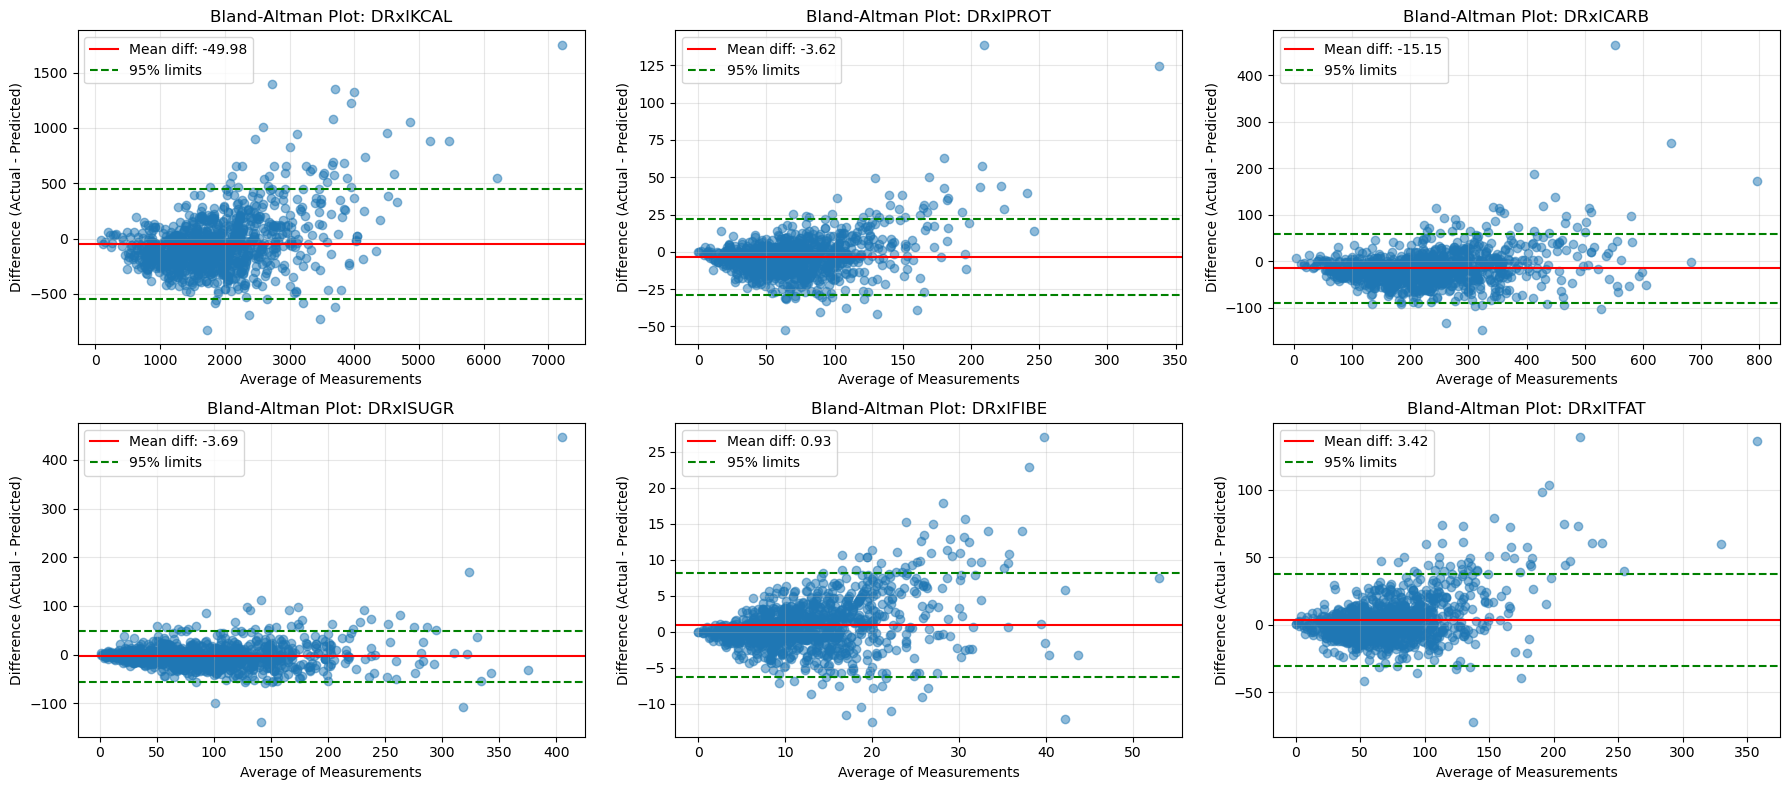

In [9]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()

# Create plots for Lin's CCC.
Ground truth vs fine-tuned mode.


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxIKCAL 0.940300
DRxIPROT 0.918055
DRxICARB 0.908587
DRxISUGR 0.896170
DRxITFAT 0.877801
DRxIFIBE 0.842993

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.9892


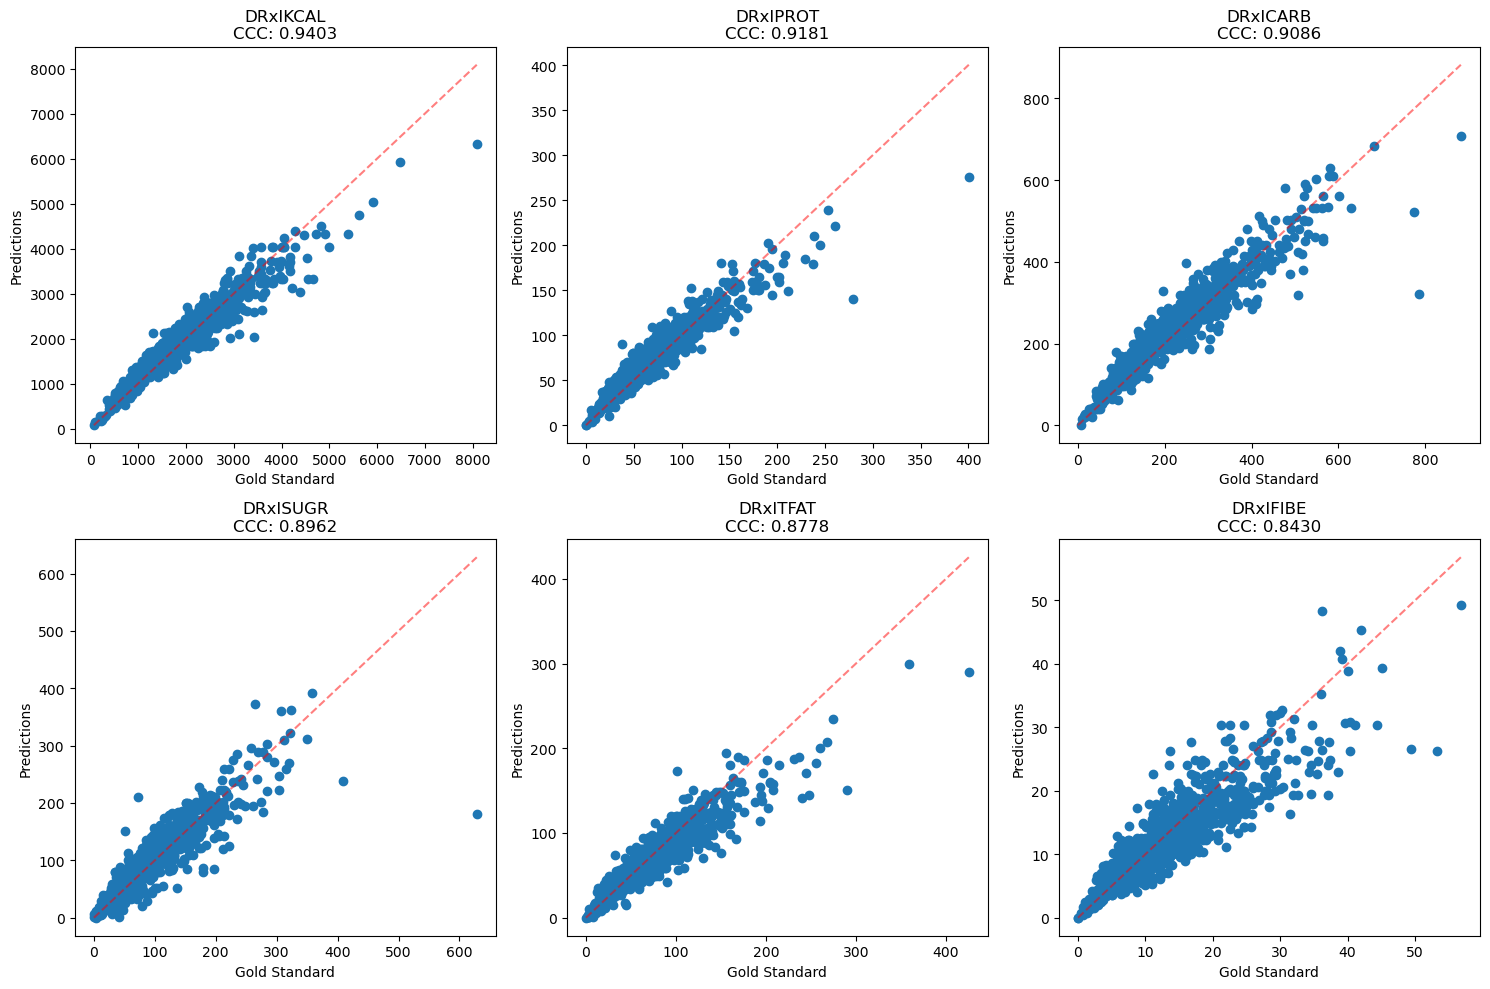

In [10]:
def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                  'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred_ft'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()